# XGBoost

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Sales forecast final.csv')
testdata=  pd.read_csv('testdata.csv')
dataset.head()

,Week,StoreNum,Category,Sales,Units,profit,week no,Year
0,201649,57,2,679064.37,12885,248695.0438,49,2016
1,201649,57,1,1268409.60,23766,380203.0771,49,2016
2,201649,57,5,94744.94,4205,34604.2306,49,2016
3,201649,57,35,1446.67,87,188.0671,49,2016
4,201649,57,7,1475152.07,24952,581748.4376,49,2016


# Data Preprocessing

In [3]:
#convert week number to int
dataset['week no']=dataset['week no'].astype('int')

In [4]:
#select required columns
data=dataset[['week no','Category','Year','Sales']]
data.head()

,week no,Category,Year,Sales
0,49,2,2016,679064.37
1,49,1,2016,1268409.60
2,49,5,2016,94744.94
3,49,35,2016,1446.67
4,49,7,2016,1475152.07


In [5]:
# Select the dependant and independant variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
#select the data set used for prediction (2019 data)
T=testdata.iloc[:,:].values


In [7]:
#append both the datasets with independant variables
T_final=np.concatenate((X,T),axis=0)


In [8]:
#encode categorical variables ('category' and 'Year')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder='passthrough',sparse_threshold=0)
T_final_encoded=np.array(ct.fit_transform(T_final))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder='passthrough',sparse_threshold=0)
X=np.array(ct.fit_transform(X))

C:\Users\mp21865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\mp21865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning,

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training XGBoost on the Training set

In [10]:
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# K fold cross validation

In [11]:
from sklearn.metrics import r2_score
y_pred = Regressor.predict(X_test)
r2_score(y_test, y_pred)

0.8592696214600672

In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.10 %
Standard Deviation: 3.86 %


# Prediction

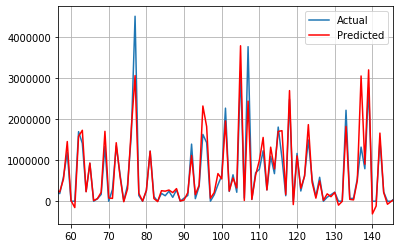

In [14]:
#Plot actual Vs Predicted values

fig, ax = plt.subplots()  
ax.plot(y_test)
ax.plot(y_pred, color='red')
plt.legend(["Actual", "Predicted"])
ax.xaxis.zoom(3) 
ax.grid()

In [15]:
#predict the entire dataset
T_pred=Regressor.predict(T_final_encoded)

In [16]:
#convert to dataframe and append predicted sales
df = pd.DataFrame(T_pred, columns =['Sales']) 
df2=pd.DataFrame(T_final, columns =['week','category','year'])
df_final = pd.concat([df2, df], axis=1)

In [ ]:
df_final.to_excel('finalforecastXG.xlsx')